In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = False, grid = False)

#### PV

##### Basic starting measurements

In [3]:
meter_readings = np.array([
    [22.7,23.9,24.2,23.1],
    [22.2,26.2,32.9,26.2]
])

In [5]:
true_power = meter_readings/12.5
true_power # mW

array([[1.816, 1.912, 1.936, 1.848],
       [1.776, 2.096, 2.632, 2.096]])

In [6]:
avg_power = true_power.mean().mean()*1e-3
avg_power # W

0.0020139999999999997

In [7]:
meter_area = (9.5e-3/2)**2*np.pi
meter_area # m^2

7.08821842466197e-05

In [9]:
pvc_dimensions = [0.0985, 0.0785]  # in meters
pvc_area = pvc_dimensions[0]*pvc_dimensions[1]

# single_cell_dimension = []  # in meters
# n_cells = 8
# pvc_area = single_cell_dimension[0] * single_cell_dimension[1] * n_cells

##### Prelim calculations

In [10]:
avg_intensity = avg_power/meter_area

In [11]:
avg_intensity

28.41334562987942

In [12]:
total_avg_light_power = avg_intensity * pvc_area

In [13]:
total_avg_light_power # Watts

0.21969909174663516

##### Main test measurements

In [14]:
pv = pd.DataFrame({
    'R': [
        0.1, 3, 10, 30, 70, 100, 150, 300,
        500, 800, 1e3, 5e3, 10e3, 5e4, 8e4, 1e5,
        5e5, 1e6
    ],
    'C': [
        23.77, 23.7, 23.67, 23.52, 21.3, 17.2,
        12.29, 6.49, 3.98, 2.54, 2.05, 0.3886,
        .1971, .03088, .02454, .01957, .00403,
        .00206
    ],
    'V': [
        .02918, .1014, .2645, .7361, 1.529, 1.7444,
        1.8527, 1.9285, 1.9528, 1.9651, 1.97, 1.9816,
        1.9829, 1.9838, 1.9843, 1.9834, 1.9832, 1.985
    ]
})

In [15]:
pv

,R,C,V
0,0.1,23.77000,0.02918
1,3.0,23.70000,0.10140
2,10.0,23.67000,0.26450
3,30.0,23.52000,0.73610
4,70.0,21.30000,1.52900
5,100.0,17.20000,1.74440
6,150.0,12.29000,1.85270
7,300.0,6.49000,1.92850
8,500.0,3.98000,1.95280
9,800.0,2.54000,1.96510


##### Analysis

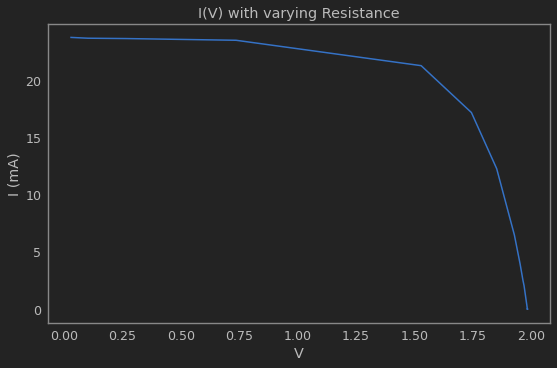

In [41]:
plt.figure(figsize = (9, 5.5))
plt.plot(pv.V, pv.C)
plt.xlabel('V')
plt.ylabel('I (mA)')
plt.title('I(V) with varying Resistance')
plt.savefig("../Images/l1_a_1.png")
plt.show()

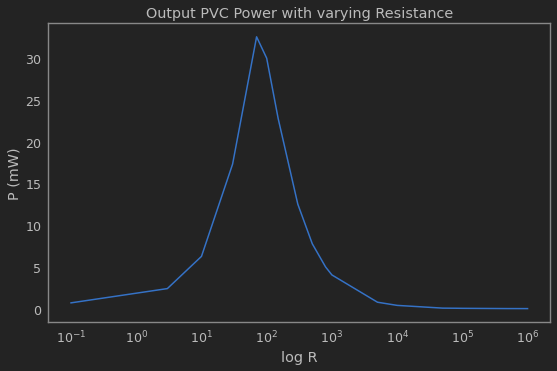

In [40]:
plt.figure(figsize = (9, 5.5))
plt.plot(pv.R, pv.V*pv.C)
plt.xscale('log')
plt.xlabel('log R')
plt.ylabel('P (mW)')
plt.title('Output PVC Power with varying Resistance')
plt.savefig("../Images/l1_a_2.png")
plt.show()

##### Results

In [18]:
P = pv.V*pv.C # power in mW

In [19]:
# quick aside to interpolate the peak just for fun

In [20]:
from scipy.interpolate import interp1d

In [21]:
lmax = np.where(P==P.max())[0][0]

In [22]:
inds = [lmax - 1, lmax, lmax + 1, lmax + 2]

In [23]:
inp = np.log10(pv.R[inds])
interp = interp1d(np.log10(pv.R), P, 'cubic')

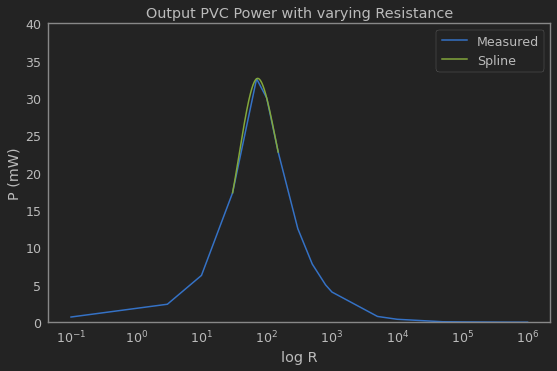

In [39]:
plt.figure(figsize = (9, 5.5))
plt.plot(pv.R, pv.V*pv.C, label='Measured')
x = np.linspace(inp.min(), inp.max(), 1000)
y = interp(x)
plt.plot(10**x, y, label = 'Spline')
plt.legend()
plt.xscale('log')
plt.xlabel('log R')
plt.ylabel('P (mW)')
plt.ylim([0, 40])
plt.title('Output PVC Power with varying Resistance')
plt.savefig("../Images/l1_b_1.png")
plt.show()

In [26]:
max_p_e = (pv.V*pv.C).max()*1e-3

In [27]:
# n_pv = P_E/P_L
f"{np.round(max_p_e/total_avg_light_power * 100, 2)} % Efficiency"

'14.82 % Efficiency'

In [28]:
# n_pv = P_E/P_L
# using estimate of peak
f"{np.round(y.max()/total_avg_light_power * 1e-3 * 100, 2)} % Efficiency"

'14.85 % Efficiency'

#### 